In [1]:
from A3C.agent import Agent
from A3C.model import Model
from A3C.training_controller import a3c_train

from shared.memory_manager import MemoryManager

import torch
import torch.optim as optim

from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration

import numpy as np
import matplotlib.pyplot as plt

import os


Loading environment football failed: No module named 'gfootball'


In [2]:
state_dict = None

In [3]:
iterations = 50000
opponents = ["greedy", "greedy", "better_random.py"]
devices = ["cpu"] * 8
learning_rate = 1e-6

In [4]:
state_dict, rewards, places, value_loss, loss = a3c_train(state_dict, iterations, learning_rate, opponents, devices)

Current Iteration 49999/50000, 100.00%, Value loss: 15.35, place: 2.0

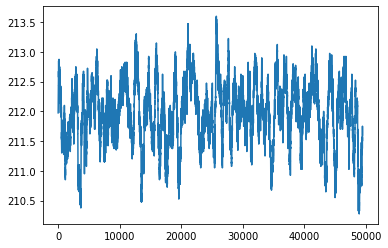

In [5]:
N = int(len(rewards) / 100)
plt.plot(np.convolve(rewards, np.ones(N)/N, mode='valid'))

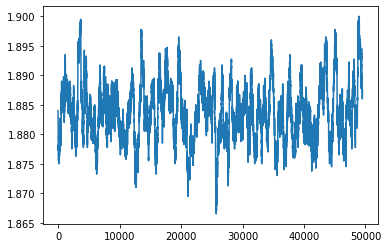

In [6]:
plt.plot(np.convolve(places, np.ones(N)/N, mode='valid'))

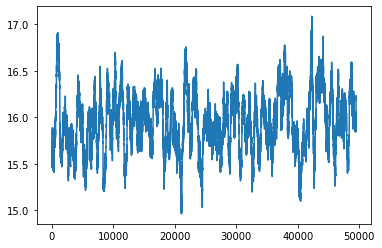

In [7]:
plt.plot(np.convolve(value_loss, np.ones(N)/N, mode='valid'))

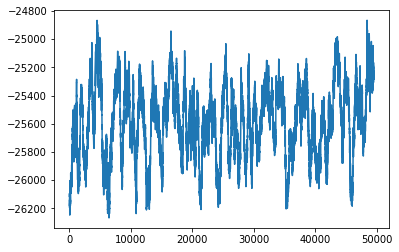

In [8]:
plt.plot(np.convolve(loss, np.ones(N)/N, mode='valid'))

In [9]:
torch.save(state_dict, "A3C/model")

!tar -czvf submission.tar.gz main.py A3C/model A3C/agent.py A3C/model.py shared/map.py


a main.py
a A3C/model
a A3C/agent.py
a A3C/model.py
a shared/map.py
